<a href="https://colab.research.google.com/github/BrianKipngeno/Apple-Quality-prediction-with-Pytorch/blob/main/Apple_quality_prediction_with_PyTorch_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1) Business Understanding

### a) Specifying the Research Question

Build a model to predict the quality rating of apple fruits.

### b) Defining the Metric for Success

Build a neural network with an accuracy of score of atleast 85%.

### c) Understanding the Context

You work as a research assistant for a big gardening company, teaming up with  engineers and researchers and  scientists to create models that can understand what makes apples good or bad based on their looks to enable farmers and customers to pick the best apple.

### d) Recording the Experimental Design

* Business Understanding
* Step 1: Data Preparation
* Step 2: Building the model
* Step 3: Forard propagation
* Step 4: Loss computation
* Step 5: Backard prpagation
* Step 6: Making predictions
* Summary of Findings and Recommendation
* Challenging our solution


## Step 1. Data Preparation

### Data exploration

In [ ]:
# Importing the required libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Loading and previewing the dataset
df = pd.read_csv('https://bit.ly/apple_quality')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
# Previewing the last entries on our dataset
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
# Checking the dataset shape
df.shape

(4001, 9)

Our dataset has 4000 records and 9 features

In [ ]:
# Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
# preview variable datatypes
df.dtypes

,0
A_id,float64
Size,float64
Weight,float64
Sweetness,float64
Crunchiness,float64
Juiciness,float64
Ripeness,float64
Acidity,object
Quality,object


### Data cleaning

In [ ]:
# Convert the "Acidity" column to float type.
#
df['Acidity'] = pd.to_numeric(df['Acidity'], errors = 'coerce')

In [ ]:
# Checking the missing values
df.isna().sum()

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,1
Quality,1


The last row of the dataset has null entries

In [ ]:
# Checking duplicates row
df.duplicated().sum()

0

In [ ]:
# We look for where the missing values ​​are located.
#
df[df.isnull().any(axis = 1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping the null row
df.dropna(inplace=True)

In [ ]:
# Dropping the unecessary column
df.drop('A_id',axis=1,inplace=True)

### Exploratory Data Analysis

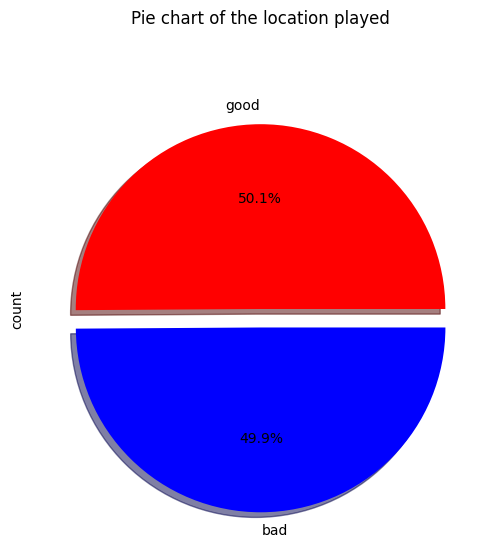

In [ ]:
# Pie chart for Quality
df['Quality'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['r','b'],figsize=(8,6),autopct='%1.1f%%')
plt.title("Pie chart of the location played", y=1.1)
plt.show()

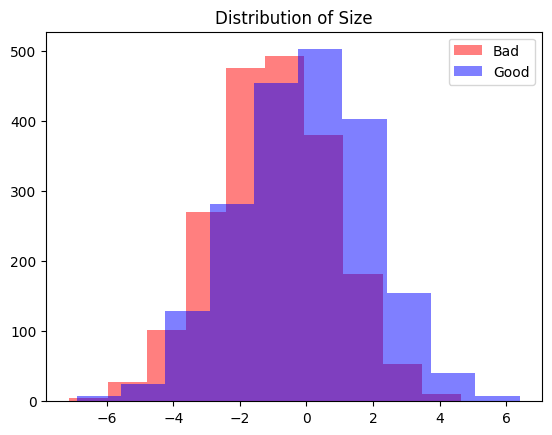

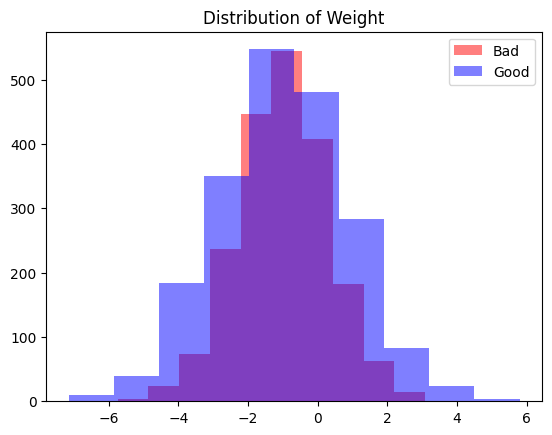

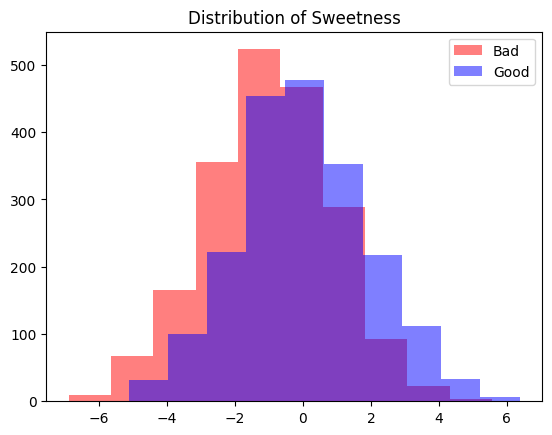

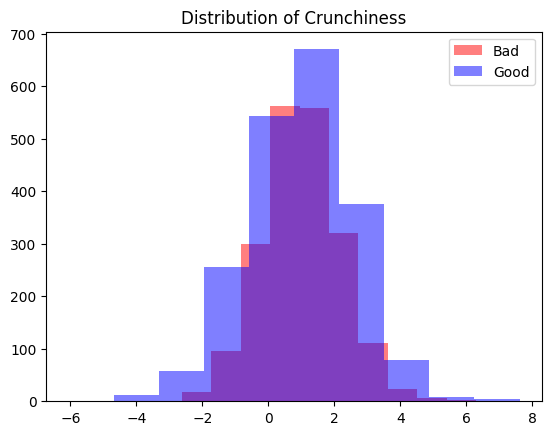

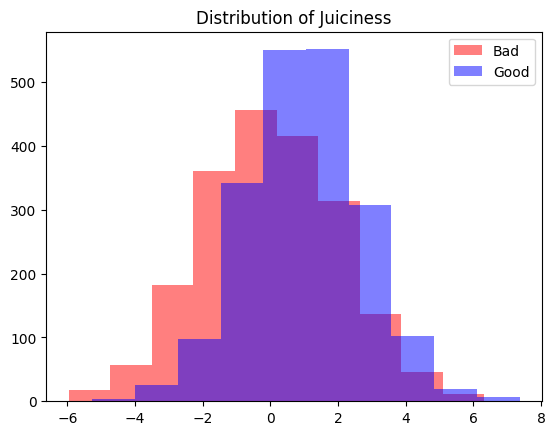

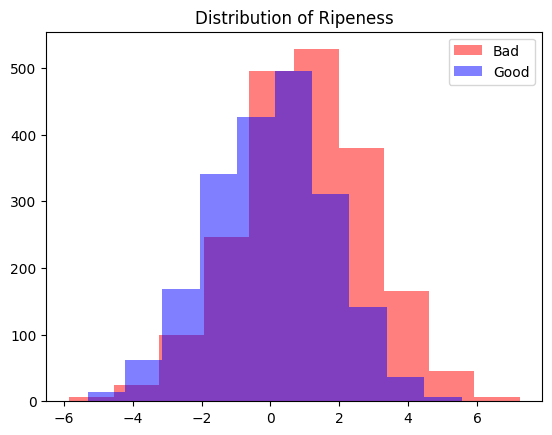

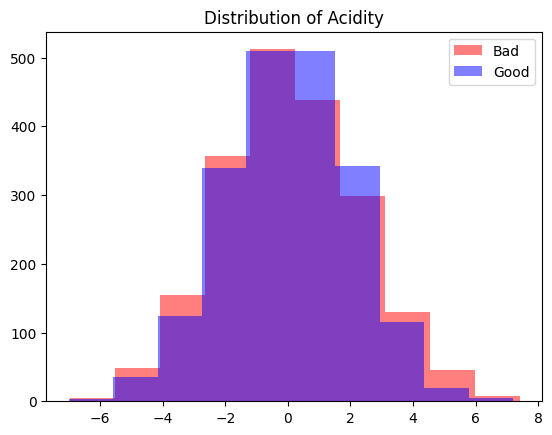

In [ ]:
# Plotting histograms of the features
for i in df.columns[:-1]:

    plt.hist(df[df['Quality']=='bad'][i],color='red',label='Bad',alpha=0.5)
    plt.hist(df[df['Quality']=='good'][i],color='blue',label='Good',alpha=0.5)
    plt.title(f'Distribution of {i}')
    plt.legend()
    plt.show()

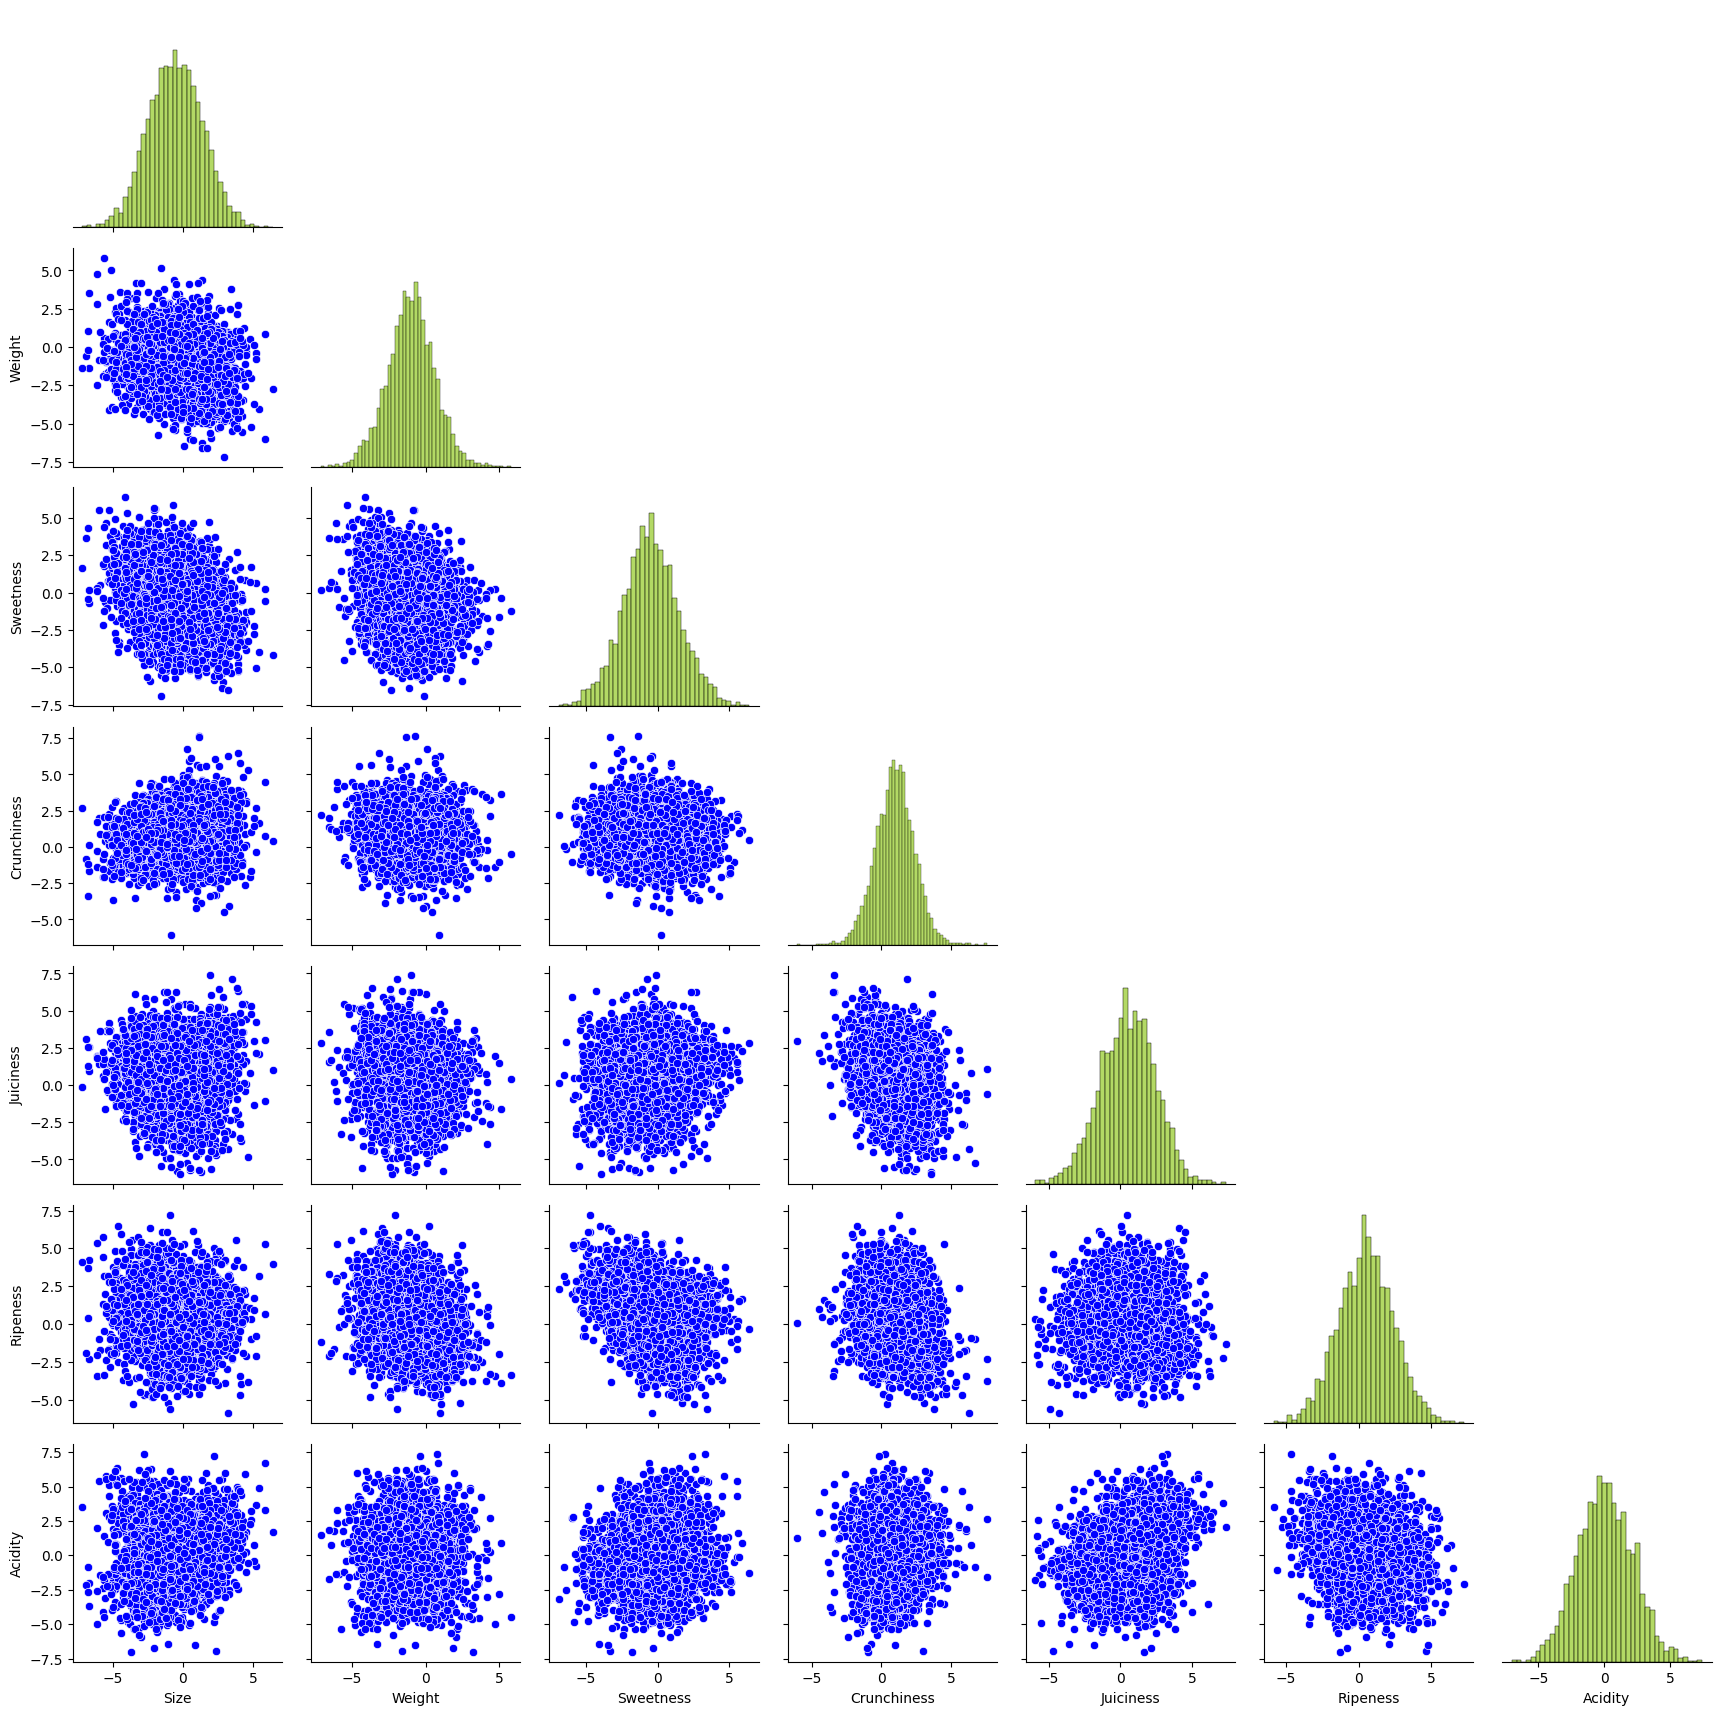

In [ ]:
# Creating a scatterplot matrix with histograms to explore pairwise relationships between variables in a dataset
g = sns.PairGrid(df, corner = True)
g.map_lower(sns.scatterplot, color = 'blue')
g.map_diag(sns.histplot, color = 'yellowgreen')
g.fig.show()

In [ ]:
# Size vs weight by quality
scatter_size_weight = px.scatter(df, x='Size', y='Weight', color='Quality', title='Size vs Weight by Quality')
scatter_size_weight.show()

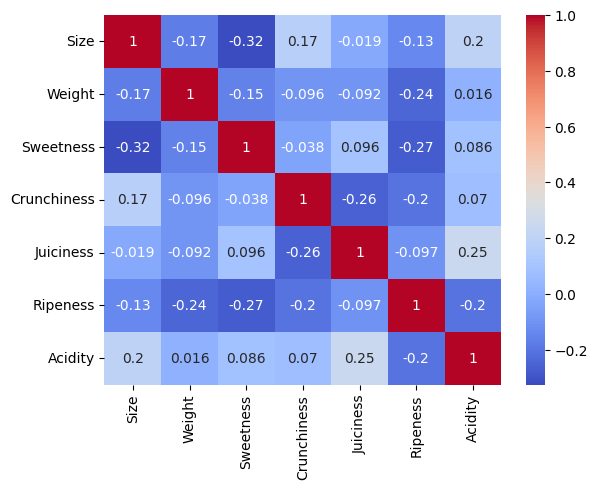

In [ ]:
# Heatmap of the correlation matrix
sns.heatmap(df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']].corr(), annot=True, cmap='coolwarm');

None of the correlations are very close to 1 or -1, suggesting that there are no extremely strong linear relationships between the features in the dataset.

### Data preprocessing

In [ ]:
# Let's assign specific numbers to the species
df['Quality'] = df['Quality'].map({'good':0,'bad':1})

## Step 2. Building the model

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Let's specify our input and output features.
#
X = df.drop(["Quality"],axis=1).values

y = df["Quality"].values

In [ ]:
# Doing the Train Test Split
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Feature scaling
#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Converting numpy arrays to tensors
#
X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)

y_test = torch.LongTensor(y_test)

In [ ]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [ ]:
# Let's build out model
from torch import nn, optim
#
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Net(input_size=7, hidden_size=14, num_classes=2)

## Step 3, 4 & 5: Forward propagation, Loss computation & Backward propagation

### Training the model

In [ ]:
# Let's train our model
#
# Let's train our model
# We use the nn.CrossEntropyLoss() function as the loss function.
# We also use the SGD optimizer with a learning rate of 0.001 and a momentum of 0.9.
# Let's define the loss using criterionn and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 1000

loss_vals = []

for epoch in range(num_epochs):
    outputs = model(X_train)

    # Let's clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

    # Step 3: Forward propagation
    outputs = model(X_train)

    # Step 4: Loss computation
    loss = criterion(outputs, y_train)

    # Step 5: Backward propagation to calculate gradients and optimization
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

    # Updating the weights
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.4773
Epoch [20/1000], Loss: 0.4668
Epoch [30/1000], Loss: 0.4556
Epoch [40/1000], Loss: 0.4450
Epoch [50/1000], Loss: 0.4354
Epoch [60/1000], Loss: 0.4267
Epoch [70/1000], Loss: 0.4189
Epoch [80/1000], Loss: 0.4116
Epoch [90/1000], Loss: 0.4050
Epoch [100/1000], Loss: 0.3991
Epoch [110/1000], Loss: 0.3937
Epoch [120/1000], Loss: 0.3887
Epoch [130/1000], Loss: 0.3842
Epoch [140/1000], Loss: 0.3800
Epoch [150/1000], Loss: 0.3761
Epoch [160/1000], Loss: 0.3724
Epoch [170/1000], Loss: 0.3690
Epoch [180/1000], Loss: 0.3658
Epoch [190/1000], Loss: 0.3628
Epoch [200/1000], Loss: 0.3599
Epoch [210/1000], Loss: 0.3572
Epoch [220/1000], Loss: 0.3545
Epoch [230/1000], Loss: 0.3520
Epoch [240/1000], Loss: 0.3495
Epoch [250/1000], Loss: 0.3472
Epoch [260/1000], Loss: 0.3449
Epoch [270/1000], Loss: 0.3427
Epoch [280/1000], Loss: 0.3406
Epoch [290/1000], Loss: 0.3386
Epoch [300/1000], Loss: 0.3366
Epoch [310/1000], Loss: 0.3347
Epoch [320/1000], Loss: 0.3329
Epoch [330/1000],

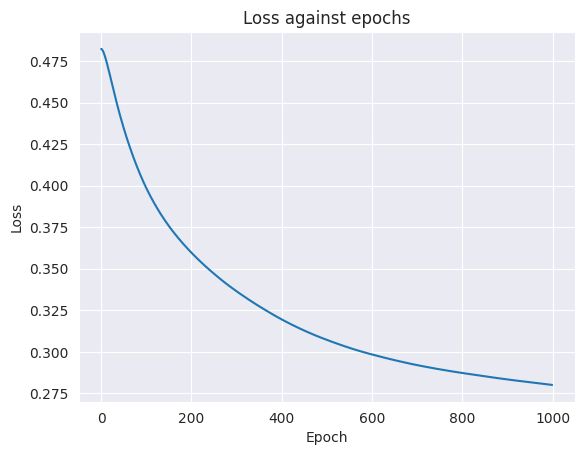

In [ ]:
# Let's plot our loss with seaborn
#
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

## Step 6: Making predictions

In [ ]:
# Finally, let's calculate the accuracy of our model.
#
from sklearn.metrics import accuracy_score

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

    accuracy = accuracy_score(y_test, predicted)

    print(f'Accuracy: {100 * accuracy:.2f}%')

Accuracy: 87.67%


### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

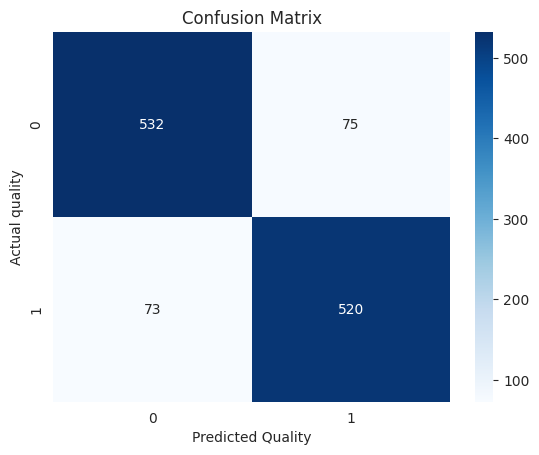

In [ ]:
# Convert PyTorch tensors to NumPy arrays
#
y_test_np = y_test.numpy()
predicted_np = predicted.numpy()
# Calculate the confusion matrix
#
cm = confusion_matrix(y_test_np, predicted_np)
# Visualize the confusion matrix using seaborn heatmap
#
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual quality')
plt.title('Confusion Matrix')
plt.show()

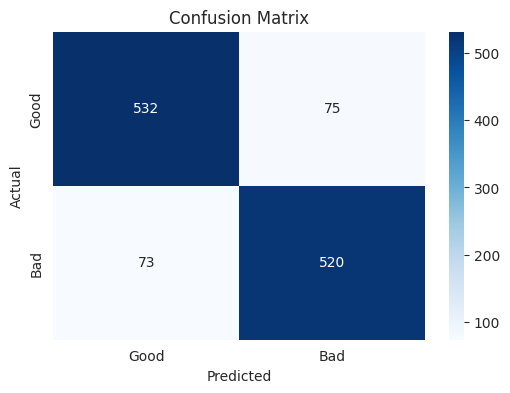

In [ ]:
    # Create confusion matrix
    cm = confusion_matrix(y_test, predicted)

    # Labels for confusion matrix
    labels = ['Good', 'Bad']

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## 2) Summary of Findings and Recommendations

- Our model correctly predicted 532 apples as good and 520 apples as bad. 73 bad apples were predicted as good by our model while 75 good apples were predicted as bad.
- This indicates an accuracy of 87.6% after optimization and our model met the requirements for this project.

## 3) Challenging our Solution

### a) Did we have the right question?


While this question is appropriate for the scope of building a binary classifier for apple quality, it may not address the full potential of quality prediction. The question could be extended to include not only the classification of apples into "good" or "bad," but also understanding why certain apples are classified as good or bad based on the features (size, weight, sweetness, etc.).

### b) Did we have the right data?



Yes

### c) What can be done to improve the solution?


- Considering precision and recall metrics for the "bad" apples, especially if identifying bad apples is critical for stakeholders.
- Experimenting with different algorithms such as Random Forest or Gradient Boosting to see if they yield better classification results.
- Hyperparameter tuning (e.g., adjusting learning rate, momentum, number of hidden layers) can also help in improving the model performance.
- Incorporaing techniques like cross-validation to ensure the model generalizes well across different data splits.